# Extracting Data from the StreamPipes data lake

In the first tutorial ([Introduction to the StreamPipes Python client](../1-introduction-to-streampipes-python-client)) we took the first steps with the StreamPipes Python client and learned how to set everything up.
Now we are ready to get started and want to retrieve some data out of StreamPipes.
In this tutorial, we'll focus on the StreamPipes Data Lake, the component where StreamPipes stores data internally.
To get started, we'll use the `client` instance created in the first tutorial.

In [1]:
from streampipes.client import StreamPipesClient
from streampipes.client.config import StreamPipesClientConfig
from streampipes.client.credential_provider import StreamPipesApiKeyCredentials

In [ ]:
# if you want all necessary dependencies required for this tutorial to be installed,
# you can simply execute the following command
%pip install matplotlib streampipes

In [2]:
import os
os.environ["SP_USERNAME"] = "admin@streampipes.apache.org"
os.environ["SP_API_KEY"] = "XXX"


In [3]:
config = StreamPipesClientConfig(
    credential_provider=StreamPipesApiKeyCredentials(),
    host_address="localhost",
    https_disabled=True,
    port=80
)

In [4]:
client = StreamPipesClient(client_config=config)

2023-02-24 17:34:25,860 - streampipes.client.client - [INFO] - [client.py:128] [_set_up_logging] - Logging successfully initialized with logging level INFO.


As a first step, we want to get an overview about all data available in the data lake.
The data is stored as so-called `measures`, which refer to a data stream stored in the data lake.
For his purpose we use the `all()` method of the `dataLakeMeasure` endpoint.

In [5]:
data_lake_measures = client.dataLakeMeasureApi.all()

2023-02-24 17:34:25,929 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


So let's see how many measures are available

In [6]:
len(data_lake_measures)

2

All resources of the StreamPipes Python client support the standard Python expressions. If not, [please let us know](https://github.com/apache/streampipes/issues/new/choose).

In [7]:
data_lake_measures[-1]

DataLakeMeasure(element_id='3cb6b5e6f107452483d1fd2ccf4bf9f9', measure_name='test', timestamp_field='s0::timestamp', event_schema=EventSchema(event_properties=[EventProperty(class_name='org.apache.streampipes.model.schema.EventPropertyPrimitive', element_id='sp:eventproperty:EiFnkL', label='Density', description='Denotes the current density of the fluid', runtime_name='density', required=False, domain_properties=['http://schema.org/Number'], property_scope='MEASUREMENT_PROPERTY', index=5, runtime_id=None, runtime_type='http://www.w3.org/2001/XMLSchema#float', measurement_unit=None, value_specification=None), EventProperty(class_name='org.apache.streampipes.model.schema.EventPropertyPrimitive', element_id='sp:eventproperty:ghSkQI', label='Mass Flow', description='Denotes the current mass flow in the sensor', runtime_name='mass_flow', required=False, domain_properties=['http://schema.org/Number'], property_scope='MEASUREMENT_PROPERTY', index=2, runtime_id=None, runtime_type='http://www.w

To get a more comprehensive overview, you can take a look at the [`pandas`](https://pandas.pydata.org/) representation

In [8]:
display(data_lake_measures.to_pandas())

,measure_name,timestamp_field,pipeline_id,pipeline_name,pipeline_is_running,num_event_properties
0,flow-rate,s0::timestamp,None,None,False,6
1,test,s0::timestamp,None,None,False,6


So far, we have only retrieved metadata about the available data lake measure.
In the following, we will access the actual data of the measure `flow-rate`.

For this purpose, we will use the `get()` method of the `dataLakeMeasure` endpoint.

In [9]:
flow_rate_measure = client.dataLakeMeasureApi.get(identifier="flow-rate")

2023-02-24 17:34:26,020 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


For further processing, the easiest way is to turn the data measure into a `pandas DataFrame`.

In [10]:
flow_rate_pd = flow_rate_measure.to_pandas()

Let's see how many data points we got...

In [11]:
len(flow_rate_pd)

1000

... and get a first overview

In [12]:
flow_rate_pd.describe()

,density,mass_flow,temperature,volume_flow
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,45.560337,5.457014,45.480231,5.659558
std,3.201544,3.184959,3.132878,3.122437
min,40.007698,0.004867,40.000992,0.039422
25%,42.819497,2.654101,42.754623,3.021625
50%,45.679264,5.382355,45.435944,5.572553
75%,48.206881,8.183144,48.248473,8.338209
max,50.998310,10.986015,50.964909,10.998676


As a final step, we want to create a plot of both attributes

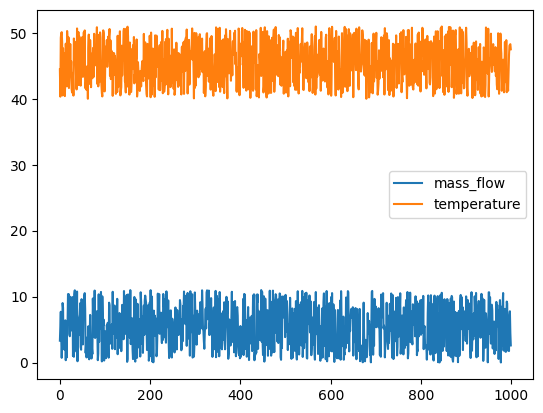

In [13]:
import matplotlib.pyplot as plt
flow_rate_pd.plot(y=["mass_flow", "temperature"])
plt.show()

For data lake measurements, the `get()` method is even more powerful than simply returning all the data for a given data lake measurement. We will look at a selection of these below. The full list of supported parameters can be found in the [docs](../../reference/endpoint/api/data_lake_measure/#streampipes.endpoint.api.data_lake_measure.MeasurementGetQueryConfig). <br>
Let's start by referring to the graph we created above, where we use only two columns of our data lake measurement. If we already know this, we can directly restrict the queried data to a subset of columns by using the `columns` parameter. <br>
`columns` takes a list of column names as a comma-separated string:

In [14]:
flow_rate_pd = client.dataLakeMeasureApi.get(identifier="flow-rate", columns="mass_flow,temperature").to_pandas()
flow_rate_pd

2023-02-24 17:34:26,492 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


,timestamp,mass_flow,temperature
0,2023-02-24T16:19:41.472Z,3.309556,44.448483
1,2023-02-24T16:19:41.482Z,5.608580,40.322033
2,2023-02-24T16:19:41.493Z,7.692881,49.239639
3,2023-02-24T16:19:41.503Z,3.632898,49.933754
4,2023-02-24T16:19:41.513Z,0.711260,50.106617
...,...,...,...
995,2023-02-24T16:19:52.927Z,1.740114,46.558231
996,2023-02-24T16:19:52.94Z,7.211723,48.048622
997,2023-02-24T16:19:52.952Z,7.770180,48.188026
998,2023-02-24T16:19:52.965Z,4.458602,48.280899


By default, the client returns only the first one thousand records of a Data Lake measurement. This can be changed by passing a concrete value for the `limit` parameter:

In [15]:
flow_rate_pd = client.dataLakeMeasureApi.get(identifier="flow-rate", limit=10000).to_pandas()
len(flow_rate_pd)

2023-02-24 17:34:26,736 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


9528

If you want your data to be selected by time of occurrence rather than quantity, you can specify your time window by passing the `start_date` and `end_date` parameters:

2023-02-24 17:34:26,899 - streampipes.endpoint.endpoint - [INFO] - [endpoint.py:167] [_make_request] - Successfully retrieved all resources.


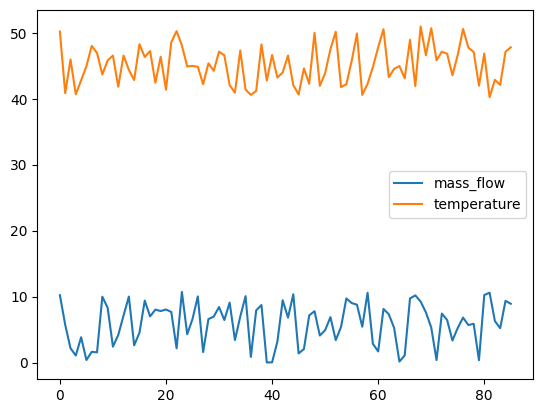

In [16]:
from datetime import datetime
flow_rate_pd = client.dataLakeMeasureApi.get(
    identifier="flow-rate",
    start_date=datetime(year=2023, month=2, day=24, hour=17, minute=21, second=0),
    end_date=datetime(year=2023, month=2, day=24, hour=17, minute=21, second=1),
    ).to_pandas()
flow_rate_pd.plot(y=["mass_flow", "temperature"])
plt.show()

... from this point on we leave all future processing of the data up to your creativity.
Keep in mind: the general syntax used in this tutorial (`all()`, `to_pandas()`, `get()`) applies to all endpoints and associated resources of the StreamPipes Python client.

If you get further and create exiting stuff with data extracted from StreamPipes please [let us know](https://github.com/apache/streampipes/discussions/categories/show-and-tell).
We are thrilled to see what you as a community will build with the provided client.
Furthermore, don't hesitate to discuss [feature requests](https://github.com/apache/streampipes/discussions/812) to extend the current functionality with us.

For now, that's all about the StreamPipes client. Read the next tutorial ([Getting live data from the StreamPipes data stream](../3-getting-live-data-from-the-streampipes-data-stream)) if you are interested in making use of the powerful [StreamPipes functions](https://streampipes.apache.org/docs/docs/extend-sdk-functions.html) to interact with StreamPipes event-based.

How do you like this tutorial?
We hope you like it and would love to receive some feedback from you.
Just go to our [GitHub discussion page](https://github.com/apache/streampipes/discussions) and let us know your impression.
We'll read and react to them all, we promise!